In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from os.path import abspath, join, curdir
import sys
from hammer import dddm
root_dir = abspath(join('..', '..'))
sys.path.append(root_dir)
from glob import glob
import vaex
from utils import calculate_probs
from init import init
from datetime import datetime

# DDDM

In [ ]:
def init(model):
    ndim = 31
    if model == 1:
        ndim = 33
    elif model == 2:
        ndim = 35
    else:
        raise ValueError("model must be 1 or 2")
    nwalkers = 2*ndim+2
    return (ndim, nwalkers)

In [ ]:
model = 2
data = 4
ndim, nwalkers = init(model)

In [3]:
data_dir = join(root_dir, 'Data', 'MCMC', 'dddm')
chain = np.load(join(data_dir, 'data', f'chain-{model}-{data}.npy'))

locs = np.load(join(data_dir, 'data', f'locs-{model}.npy'))
scales = np.load(join(data_dir, 'data', f'scales-{model}.npy'))

zfiles = glob(join(root_dir, 'Data', 'Effective-Volume-v', '*.hdf5'))
zfiles.sort()
wfiles = glob(join(root_dir, 'Data', 'Velocity-Distribution-v', 'gaia*.hdf5'))
wfiles.sort()
zfiles, wfiles

zfile = zfiles[data]
wfile = wfiles[data]
zdata = vaex.open(zfile)

zmid = zdata['z'].to_numpy()
znum = zdata['znum'].to_numpy()
zerr = zdata['err'].to_numpy()

wdata = vaex.open(wfile)

wmid = wdata['w'].to_numpy()
wnum = wdata['num'].to_numpy()
werr = wdata['err'].to_numpy()

zdata = (zmid, znum, zerr)
wdata = (wmid, wnum, werr)

In [4]:
probs = calculate_probs(dddm, chain, ndim, zdata, wdata, locs, scales, batch=1000)
prior_dddm = probs[:, 0]
likelihood_dddm = probs[:, 1]
posterior_dddm = probs[:, 2]
max_likelihood_dddm = np.max(likelihood_dddm)

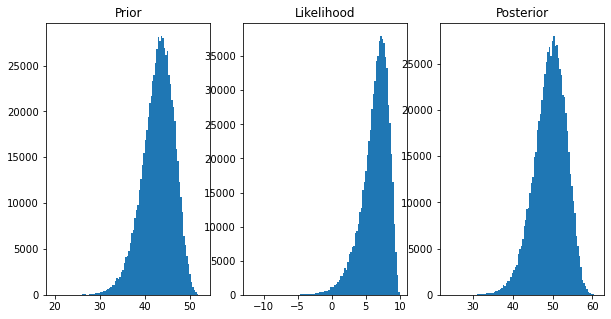

In [8]:
# plot histogram of the probs
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 3, figsize=(10, 5))
ax[0].hist(prior_dddm, bins=100)
ax[0].set_title('Prior')
ax[1].hist(likelihood_dddm, bins=100)
ax[1].set_title('Likelihood')
ax[2].hist(posterior_dddm, bins=100)
ax[2].set_title('Posterior')
plt.show()

In [6]:
# calculate BIC
bic = -2 * max_likelihood_dddm + ndim * np.log(3*len(zmid)+3*len(wmid))
print(f"BIC: {bic}")

BIC: 144.87824955836112
